In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Resources/Final_new_draft.csv")
df
             

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61066,61066,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61067,61067,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,...,0.0000,0.0000,0.0000,C,0.00000,NaN,NaN,NaN,NaN,NaN
61068,61068,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61069,61069,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN


In [3]:
#draftstatus= df['draft_status']
#draftstatus.replace["Undrafted" : 0, inplace=True]
#draftstatus.replace["Drafted" : 1, ]

In [4]:
df.loc[df['draft_status'] == "Undrafted", 'draft_status'] = 0
df.loc[df['draft_status'] == "Drafted", 'draft_status'] = 1
df['draft_status'].head(78)

0     0
1     0
2     0
3     0
4     0
     ..
73    1
74    1
75    1
76    0
77    0
Name: draft_status, Length: 78, dtype: object

In [5]:
#newdf = df['draft_status'].astype(int)
#newdf.dtypes

In [6]:
droppedstats =df.dropna(axis=0, subset=["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"])
droppedstats

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61058,61058,Jordan Nesbitt,Memphis,Amer,3,1.0,50.3,30.1,37.5,37.50,...,0.0000,0.0000,1.0000,Stretch 4,15.41270,NaN,NaN,NaN,NaN,NaN
61059,61059,Quinn Pemberton,Boston College,ACC,2,0.9,0.0,13.8,0.0,0.00,...,0.0000,0.0000,0.0000,Combo G,7.69879,NaN,NaN,NaN,NaN,NaN
61060,61060,Mac Etienne,UCLA,P12,13,11.0,99.1,15.1,60.0,55.37,...,0.1538,0.1538,2.6154,C,0.00000,NaN,NaN,NaN,NaN,NaN
61062,61062,Lysander Rehnstrom,George Mason,A10,2,0.3,0.0,32.2,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,22.22830,NaN,NaN,NaN,NaN,NaN


In [7]:
droppedstats["draft_status"].value_counts()


0    54900
1     1444
Name: draft_status, dtype: int64

In [8]:
newdf = droppedstats['draft_status'].astype(int)
#newdf

In [9]:
stats = ["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"]
X = droppedstats[stats]
y= newdf

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
rcf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
score1= rcf.score(X_train_scaled, y_train)
score2 =rcf.score(X_test_scaled, y_test)
print(score1)


1.0


In [12]:
print(score2)

0.9734488144256709


[0.14141608 0.11194565 0.10291005 0.10003782 0.12802042 0.11168157
 0.11218158 0.09432056 0.09748627]


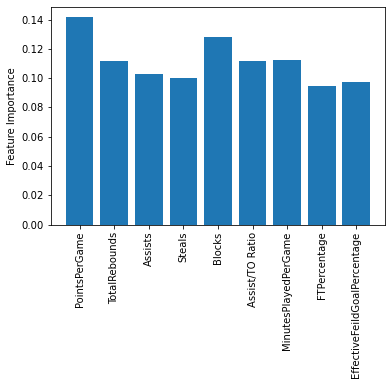

In [13]:
features = rcf.feature_importances_
#xlabels = ["PointsPerGame", "TotalRebounds", "Assists", "Steals", "Blocks", "Assist/TO Ratio", "MinutesPlayedPerGame","FTPercentage", "EffectiveFeildGoalPercentage"]
print(features)
plt.bar(x=range(len(features)), height=features)
plt.xticks(np.arange(9), ["PointsPerGame", "TotalRebounds", "Assists", "Steals", "Blocks", "Assist/TO Ratio", "MinutesPlayedPerGame","FTPercentage", "EffectiveFeildGoalPercentage"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

In [14]:
fresh = df.loc[df['yr']=="Fr"]
soph = df.loc[df['yr']=="So"]
junior = df.loc[df['yr']=="Jr"]
senior = df.loc[df['yr']=="Sr"]

In [15]:
testingfilepath = "Resources/Potential_Draft.csv"
potentialdraft_df= pd.read_csv(testingfilepath)
potentialdraft_df.head()



,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430


In [16]:
potentialdraft_df["draft_status"]

0       Undrafted
1       Undrafted
2       Undrafted
3       Undrafted
4       Undrafted
          ...    
3973    Undrafted
3974    Undrafted
3975    Undrafted
3976    Undrafted
3977    Undrafted
Name: draft_status, Length: 3978, dtype: object

In [17]:
potentialdraft_df.loc[df['draft_status'] == "Undrafted", 'draft_status'] = 0
potentialdraft_df.loc[df['draft_status'] == "Drafted", 'draft_status'] = 1
potentialdraft_df['draft_status']

0       Undrafted
1       Undrafted
2       Undrafted
3       Undrafted
4       Undrafted
          ...    
3973    Undrafted
3974    Undrafted
3975    Undrafted
3976    Undrafted
3977    Undrafted
Name: draft_status, Length: 3978, dtype: object

In [18]:
predroppedstats =potentialdraft_df.dropna(axis=0, subset=["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"])
predroppedstats

,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,3956,Mac Etienne,UCLA,P12,13,11.0,99.1,15.1,60.0,55.37,...,0.799673,0.9231,1.9231,2.8462,0.2308,0.1538,0.1538,2.6154,C,0.000000
3957,3957,Ryan Woods,Arkansas Pine Bluff,SWAC,7,2.8,90.1,14.7,70.0,58.82,...,1.929770,0.0000,0.0000,0.0000,0.2857,0.4286,0.0000,1.0000,Pure PG,4.113400
3959,3959,Lysander Rehnstrom,Navy,Pat,2,0.3,0.0,32.2,0.0,0.00,...,-13.826600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,22.228300
3960,3960,Trey James,Iona,MAAC,2,0.8,45.9,29.9,0.0,52.63,...,-5.286060,0.5000,0.5000,1.0000,0.0000,0.0000,0.0000,0.5000,C,0.000000


In [20]:
Output = pd.DataFrame({"Player Name": predroppedstats.player_name, "Drafted?": draftpredictions})
Output["Drafted?"].value_counts()

ValueError: Data must be 1-dimensional

In [24]:
stats = ["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"]
X_test= predroppedstats[stats]
draftpredictions = rcf.predict_proba(X_test)
draftpredictions


array([[0.782, 0.218],
       [0.48 , 0.52 ],
       [0.472, 0.528],
       ...,
       [0.992, 0.008],
       [0.986, 0.014],
       [0.982, 0.018]])

In [33]:
listed = draftpredictions.tolist()

In [42]:
Output = pd.DataFrame(draftpredictions, columns=["Yesdraft","Nodraft"])
Output["Player"] = predroppedstats["player_name"]
Output

,Yesdraft,Nodraft,Player
0,0.782,0.218,Isaiah Felder
1,0.480,0.520,Jalen Coleman-Lands
2,0.472,0.528,K.J. Walton
3,0.462,0.538,Jeriah Horne
4,0.512,0.488,Eric Curry
...,...,...,...
3395,0.724,0.276,Noah Hupmann
3396,0.610,0.390,Zach Anderson
3397,0.992,0.008,Nate Johnson
3398,0.986,0.014,Jake Evans


In [53]:
Output_V= Output["Yesdraft"].astype(int)
Output_M= Output["Nodraft"].astype(int)
Output["Yesdraft"] = Output_V
Output["Nodraft"] = Output_M
Output.dtypes

Yesdraft     int32
Nodraft      int32
Player      object
dtype: object

In [66]:
col = Output["Yesdraft"]
count = col[col > 0.8].count()
print(count)

1


<AxesSubplot:>

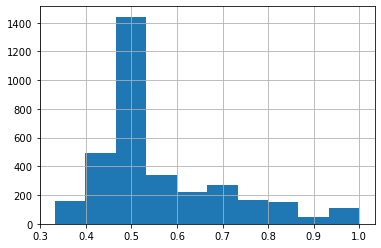

In [25]:
pd.Series(rcf.predict_proba(X_test)[:,0]).hist()

In [ ]:
pd.Series(draftpredictions).value_counts()

In [ ]:
#Precission Recall Curve
pd.Series(rcf.predict_proba(X_test_scaled)[:,1]).hist()


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, draftpredictions)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


In [ ]:
X_test